In [10]:
from PIL import Image
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

In [11]:
img_path = "resource/merge_unet2_v2_r4_test/"
bg_path = "Result/Unet2_v2/predict_output/Round4/result_test/"
save_path = "Images/lesion_shape/"
save_merge = "Images/Unet2_v2/Round4/"

imglist = os.listdir(img_path)
bglist = os.listdir(bg_path)
print(len(imglist))

103


In [12]:
kernel = np.ones((3,3),np.uint8)
kernel_o = disk(3)

In [13]:
def blur(img,size):
    blur = cv2.blur(img,(size,size))
    blur2 = cv2.GaussianBlur(img,(1,1),0)

    absd=cv2.equalizeHist(cv2.absdiff(blur2,blur))
    
    return absd

In [14]:
def paste(img,bg):
    x,y = img.size
#     img = Image.open(img)
#     background = Image.open(bg)
    bg.paste(img, (0, 0), img)
    return bg

## EDGE

In [15]:
for x in bglist:
    label_original = cv2.imread('resource/dataset_ev/label/'+x,cv2.IMREAD_COLOR)
    image_gray = cv2.cvtColor(label_original, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.resize(image_gray, (256,256))
    
    filtered_image = cv2.Canny(image_gray, threshold1=20, threshold2=200)
    
    # SQUARE
    dilation = cv2.dilate(filtered_image,kernel,iterations = 1)
    erosion = cv2.erode(dilation,kernel,iterations = 1)
    erosion = blur(erosion,2)
    # erosion = cv2.erode(erosion,kernel,iterations = 1)
    erosion = cv2.cvtColor(erosion, cv2.COLOR_GRAY2RGB)
    erosion[np.where((erosion!=[0,0,0]).all(axis=2))]=[0,255,0]
    erosion[np.where((erosion==[0,0,0]).all(axis=2))]=255
    
    imgName = x[x.find("/T1") + 1 : -4]
    img = Image.fromarray(erosion.astype(np.uint8))
    
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
            
    img.putdata(newData)
    
    img.save(save_path + imgName + '.png' , 'PNG')

## MERGE

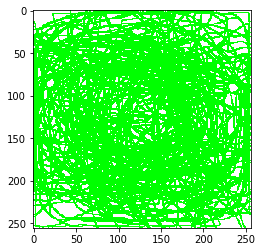

In [16]:
for x in imglist :
    img = Image.open(img_path + x)
    lesion = Image.open(save_path + x)
    plt.imshow(lesion)
#     print(type(img),type(background),x, img.size, background.size)
    
    img.paste(lesion, (0, 0), lesion)
    img.save(save_merge + x , 'PNG')

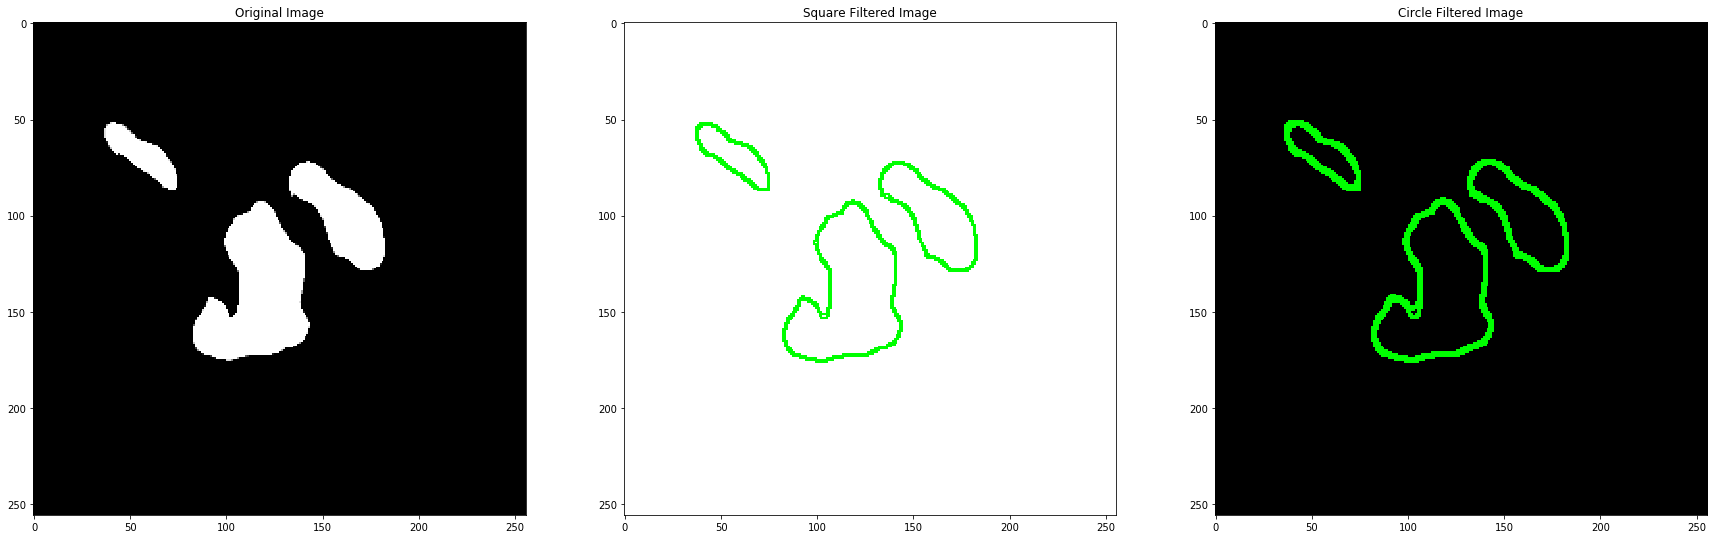

In [182]:
image_original = cv2.imread('resource/dataset_ev/label/T1T1EV0100.png', cv2.IMREAD_COLOR)
bg_original = cv2.imread('resource/dataset_ev/image/T1T1EV0100.png', cv2.IMREAD_COLOR)
# remove noise
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Canny(image_gray, threshold1=20, threshold2=200)
# filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_GRAY2RGB)
# filtered_image[np.where((filtered_image==[255,255,255]).all(axis=2))]=[255,0,0]
# filtered_image[np.where((filtered_image==[0,0,0]).all(axis=2))]=[255,255,255]

# SQUARE
dilation = cv2.dilate(filtered_image,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)
erosion = blur(erosion,2)
# erosion = cv2.erode(erosion,kernel,iterations = 1)
erosion = cv2.cvtColor(erosion, cv2.COLOR_GRAY2RGB)
erosion[np.where((erosion!=[0,0,0]).all(axis=2))]=[0,255,0]
erosion[np.where((erosion==[0,0,0]).all(axis=2))]=[255,255,255]

# CIRCLE
dilation_o = cv2.dilate(filtered_image,kernel_o,iterations = 1)
erosion_o = cv2.erode(dilation_o,kernel_o,iterations = 1)
erosion_o = blur(erosion_o,3)
# erosion_o = cv2.erode(dilation_o,kernel_o,iterations = 1)
erosion_o = cv2.cvtColor(erosion_o, cv2.COLOR_GRAY2RGB)
erosion_o[np.where((erosion_o!=[0,0,0]).all(axis=2))]=[0,255,0]

# # Paste
# bg = Image.fromarray(bg_original,'RGB')
# bg2 = bg.copy()
# img2 = Image.fromarray(erosion,'RGB')
# # print(type(img2))
# bg2.paste(img2, (0, 0), img2)
# print(bg2)

# bg3 = bg.copy()
# # pic2 = paste(img2,bg)
# img3 = Image.fromarray(erosion_o,'RGB')
# # pic3 = paste(img3,bg)
# bg3.paste(img3, (0, 0), img3)


# Plot outputs
(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(30, 30))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)

ax2.title.set_text('Square Filtered Image')
ax2.imshow(erosion, cmap='gray')

ax3.title.set_text('Circle Filtered Image')
ax3.imshow(erosion_o, cmap='gray')


In [ ]:
for x in bglist :
    img = Image.open(img_path + x)
    background = Image.open(bg_path + x)

    background.paste(img, (0, 0), img)
    background.save(save_path + x , 'PNG')